# Mel Cepstral Distance Example

### Import some stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.io import wavfile
from error import mel_cep_dtw_dist

### Taking a look at example .wav files
* Target is a sentence by VCC2SF1
  * http://www.kecl.ntt.co.jp/people/kaneko.takuhiro/projects/stargan-vc2/audios/VCC2SF1_30004.wav
* Converted is synthesized VCC2SM1 → VCC2SF1
  * http://www.kecl.ntt.co.jp/people/kaneko.takuhiro/projects/stargan-vc2/audios/VCC2SF1_VCC2SM1_STARGANVC2_30004.wav
  
NB: audio taken from http://www.kecl.ntt.co.jp/people/kaneko.takuhiro/projects/stargan-vc2/index.html

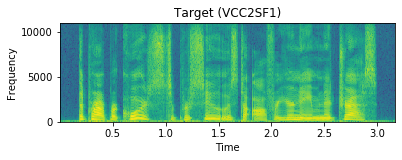

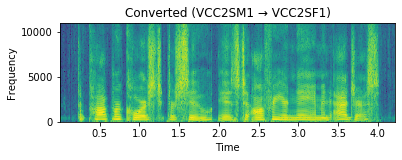

In [2]:
sampling_target, signal_target = wavfile.read('./data/wav16/sf1/VCC2SF1_30004.wav')
sampling_converted, signal_converted = wavfile.read('./data/wav16/sm1_to_sf1/VCC2SF1_VCC2SM1_STARGANVC2_30004.wav')
    
plot.subplot(212)
plot.specgram(signal_target, Fs=sampling_target)
plot.title('Target (VCC2SF1)')
plot.xlabel('Time')
plot.ylabel('Frequency') 
plot.show()

plot.subplot(212)
plot.specgram(signal_converted, Fs=sampling_converted)
plot.title('Converted (VCC2SM1 → VCC2SF1)')
plot.xlabel('Time')
plot.ylabel('Frequency') 
plot.show()

### Preprocess the target (reference) and converted (synthesized) to WORLD encoded numpy arrays

Run the following in the root of the repository:

```
python preprocess.py -d data/wav16/ -s sf1 sm1_to_sf1 -o data/processed/
```

* This encodes all `.wav` files in `data/wav16/sf1` (target reference speech) and `data/sm1_to_sf1` (converted synthesized speech) and outputs to `data/processed`
* For this example notebook this script has been ran for you

### Load example target and converted, WORLD encoded speech files

In [3]:
target = np.load('./data/processed/VCC2SF1_30004.npy')
converted = np.load('./data/processed/VCC2SF1_VCC2SM1_STARGANVC2_30004.npy')
print(target.shape, converted.shape)

(635, 36) (844, 36)


### Calculate distance
The speech signals are not aligned, so must use dynamic time warping

In [4]:
distance = mel_cep_dtw_dist(target, converted)
print('MCD:', distance, 'dB')

MCD: 4.03540222699 dB
